In [2]:
# 이미지 불러오는 모듈
from glob import glob
import matplotlib.pyplot as plt
import cv2 as cv # opencv

# 기본모듈
import numpy as np

# 딥러닝
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.applications import VGG16, VGG19

In [3]:
# 이미지 파일경로 전부 불러와서 리스트에 저장
file_list = glob('./data/train/*.jpg')

In [15]:
file_list[:5]

['./data/train\\cat.0.jpg',
 './data/train\\cat.1.jpg',
 './data/train\\cat.10.jpg',
 './data/train\\cat.100.jpg',
 './data/train\\cat.1000.jpg']

In [16]:
# 0번째 이미지만 불러오기
x = plt.imread(file_list[0])

In [5]:
x.shape

(374, 500, 3)

In [6]:
type(x)

numpy.ndarray

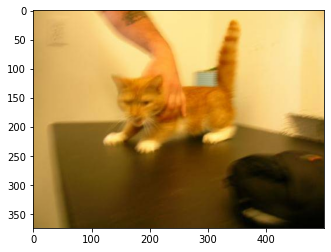

In [7]:
plt.imshow(x)

In [8]:
# 5개 파일을 확인해보면
# 파일 사이즈가 전부 다르기 때문에 사이즈를 맞춰줘야함
for file in file_list[:5]:
    print(plt.imread(file).shape)

(374, 500, 3)
(280, 300, 3)
(499, 489, 3)
(499, 403, 3)
(149, 150, 3)


(150, 150, 3)


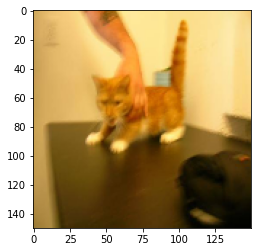

In [9]:
# 0번째 파일을 150,150 크기로 변환하기
x = cv.resize(plt.imread(file_list[0]), (150,150))
plt.imshow(x)
print(x.shape)

In [12]:
# train값 받을 리스트 생성
X = np.zeros((3000,150,150,3))
X.shape

(3000, 150, 150, 3)

In [17]:
# X랑 y 생성
y = []
for idx, file in enumerate(file_list):
    x = plt.imread(file)
    x = cv.resize(x,(150,150))
    X[idx] = x
    if 'cat' in file:
        y.append(0)
    else:
        y.append(1)

In [19]:
X.shape

(3000, 150, 150, 3)

In [20]:
y = np.array(y)
y.shape

(3000,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
input_shape = X_train.shape[1:]
input_shape

(150, 150, 3)

## 모델 구성

In [23]:
from keras import layers
from keras import models

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

In [32]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\admin\anaconda3\envs\django2\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
dog_cat_callbacks = [
    EarlyStopping(patience=7),
    TensorBoard(log_dir='./dog_cat_logs')
]

history = model.fit(X_train,
         y_train,
         epochs=30,
         batch_size=100,
         validation_data=(X_test,y_test),
         callbacks=dog_cat_callbacks)

Epoch 1/30
23/23 [==============================] - 44s 2s/step - loss: 4.5059e-10 - acc: 1.0000 - val_loss: 1.0931e-09 - val_acc: 1.0000
Epoch 2/30
23/23 [==============================] - 45s 2s/step - loss: 4.5056e-10 - acc: 1.0000 - val_loss: 1.0930e-09 - val_acc: 1.0000
Epoch 3/30
23/23 [==============================] - 48s 2s/step - loss: 4.5052e-10 - acc: 1.0000 - val_loss: 1.0930e-09 - val_acc: 1.0000
Epoch 4/30
23/23 [==============================] - 53s 2s/step - loss: 4.5042e-10 - acc: 1.0000 - val_loss: 1.0926e-09 - val_acc: 1.0000
Epoch 5/30
23/23 [==============================] - 63s 3s/step - loss: 4.5000e-10 - acc: 1.0000 - val_loss: 1.0921e-09 - val_acc: 1.0000
Epoch 6/30
23/23 [==============================] - 57s 2s/step - loss: 4.4941e-10 - acc: 1.0000 - val_loss: 1.0903e-09 - val_acc: 1.0000
Epoch 7/30
23/23 [==============================] - 53s 2s/step - loss: 4.4743e-10 - acc: 1.0000 - val_loss: 1.0847e-09 - val_acc: 1.0000
Epoch 8/30
23/23 [================